In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
import statsmodels.api as sm
super_df = pd.read_excel('/content/sample_data/ Superstore.xls')
super_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
super_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
super_df.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  ... Quantity Discount    Profit
0          1  CA-2016-152156 2016-11-08  ...        2     0.00   41.9136
1          2  CA-2016-152156 2016-11-08  ...        3     0.00  219.5820
2          3  CA-2016-138688 2016-06-12  ...        2     0.00    6.8714
3          4  US-2015-108966 2015-10-11  ...        5     0.45 -383.0310
4          5  US-2015-108966 2015-10-11  ...        2     0.20    2.5164
...      ...             ...        ...  ...      ...      ...       ...
9989    9990  CA-2014-110422 2014-01-21  ...        3     0.20    4.1028
9990    9991  CA-2017-121258 2017-02-26  ...        2     0.00   15.6332
9991    9992  CA-2017-121258 2017-02-26  ...        2     0.20   19.3932
9992    9993  CA-2017-121258 2017-02-26  ...        4     0.00   13.3200
9993    9994  CA-2017-119914 2017-05-04  ...        2     0.00   72.9480

[9994 rows x 21 columns]>

In [6]:
super_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
super_df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [8]:
super_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
furniture = super_df.loc[super_df['Category']== 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [11]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
r_col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(r_col, axis =1 , inplace=True)
furniture

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [14]:
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [15]:
furniture  = furniture.set_index('Order Date')
furniture



,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


In [17]:
furniture_y = furniture['Sales'].resample('MS').mean()
# MS = Month Start frequency
furniture_y


Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

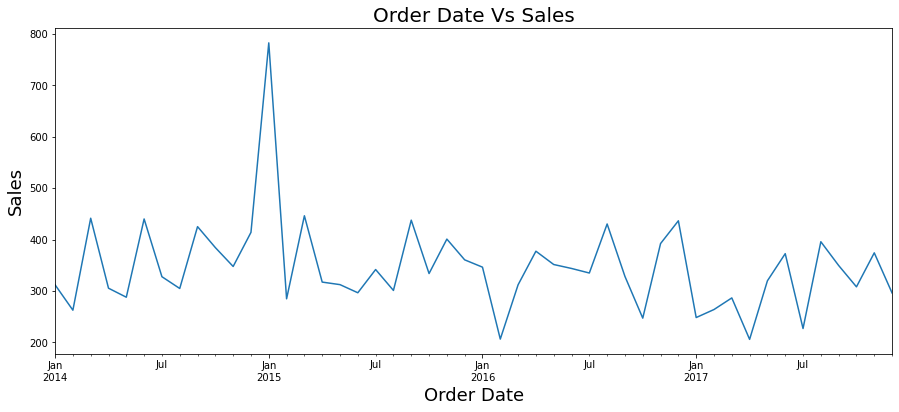

In [18]:
furniture_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [19]:
from pylab import rcParams as rc
rc['figure.figsize']= 10, 14
decomposition = sm.tsa.seasonal_decompose(furniture_y,model='additive')

# y(t) = Level + Trend + Seasonality + Noise --> Additive
print("Trend \n ")
print(decomposition.trend)
print("Seasonal \n ")
print(decomposition.seasonal)
print("Residual \n ")
print(decomposition.resid)
print("Observed \n ")
print(decomposition.observed)

Trend 
 
Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    374.193980
2014-08-01    394.721952
2014-09-01    395.843644
2014-10-01    396.537833
2014-11-01    398.052013
2014-12-01    393.092036
2015-01-01    387.693906
2015-02-01    388.116466
2015-03-01    388.482340
2015-04-01    386.905447
2015-05-01    387.021881
2015-06-01    387.013984
2015-07-01    366.614267
2015-08-01    345.176367
2015-09-01    336.320775
2015-10-01    333.230934
2015-11-01    337.362959
2015-12-01    340.962498
2016-01-01    342.649705
2016-02-01    347.753039
2016-03-01    348.579497
2016-04-01    340.406881
2016-05-01    336.432430
2016-06-01    339.235603
2016-07-01    338.316789
2016-08-01    336.629079
2016-09-01    337.959488
2016-10-01    329.751323
2016-11-01    321.288243
2016-12-01    321.166778
2017-01-01    317.868371
2017-02-01    311.933890
2017-03-01    311.382148
2017-

<function matplotlib.pyplot.show>

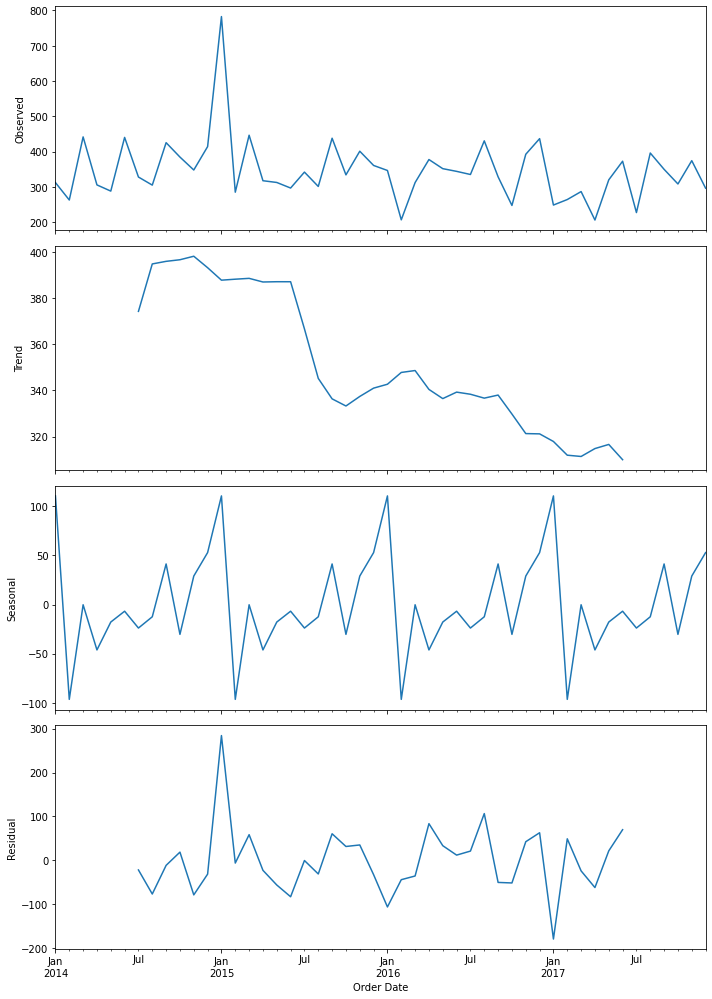

In [20]:
fig = decomposition.plot()
plt.show



In [22]:
p=d=q=range(0,2)
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [23]:
pdq = list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [24]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(furniture_y,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 688.3112416991725
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1383.3492315814128
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 426.20464898591723
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 452.8238602501692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1330.904289473867
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 295.446456472235
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 641.124068066576
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2840.931796355931
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 416.5496453364607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 455.13972999539027
ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 2329.5075788588374
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 297.44640662501945
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 580.6389269639644


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1392.4613627961671
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 433.35521367147123
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 437.46040107889746
ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1449.2499885007337
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 294.1158452476943
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 538.8964721447211
ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2966.2805647244422
ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 412.8726989905004
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 419.1839792724933
ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 2608.4894340622413
ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 273.4032454636305
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 592.7661498749849


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1198.6098278493414
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 427.72411597383274
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 420.4114538992035
ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1132.6624250717703
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 273.5840395565935
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 553.2719417804212
ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2735.142169060686
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 418.5261783089179
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 422.4003583323367
ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 275.47757405308926
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 566.5211872508684
ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1252.1694323373827


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 430.3305770817938
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 397.3668981651568


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1441.0319096718458
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 273.4415398792929
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 540.6257368397364
ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2961.0345952293446
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 414.7726173042696
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 391.83032555617586
ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 2825.4306879342535
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 263.9371084381277


In [26]:
mod = sm.tsa.statespace.SARIMAX(furniture_y,
                               order=(1,1,1),
                               seasonal_order= (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9742   6.86e-05   9.22e+07      0.000    6323.974    6323.974


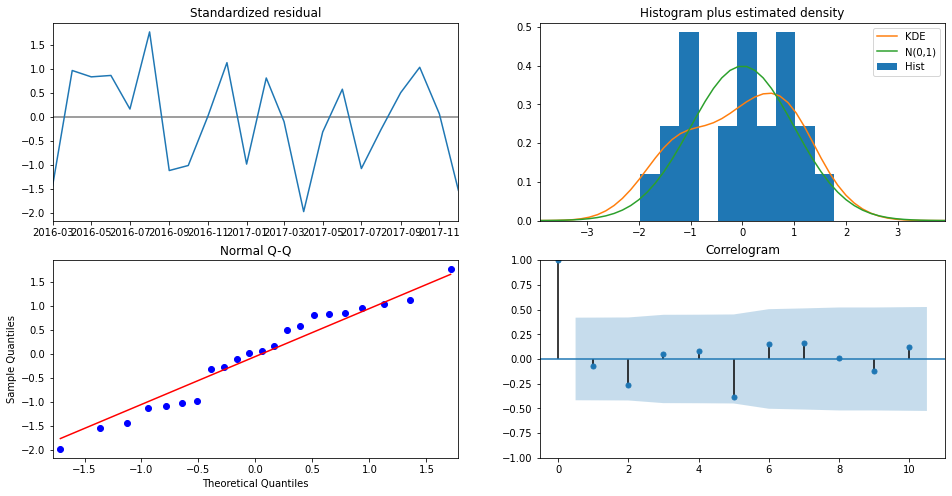

In [27]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

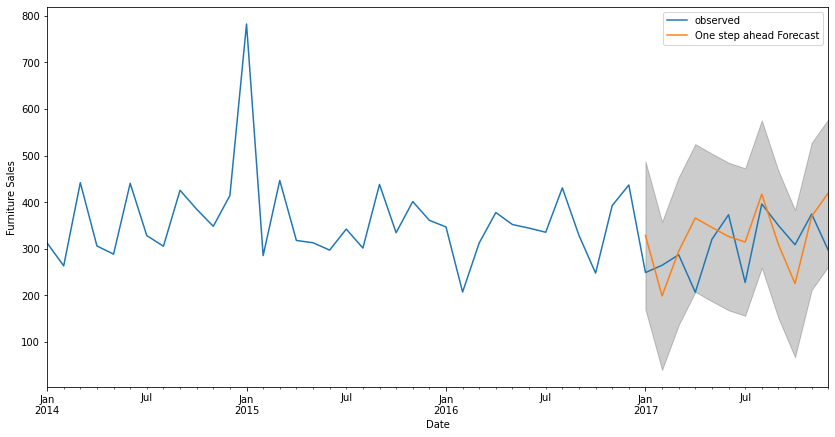

In [28]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = furniture_y['2014':].plot(label= 'observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 7, figsize= (14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [29]:
furniture_forecasted = pred.predicted_mean
furn_truth = furniture_y['2017-01-01':]
mse = ((furniture_forecasted - furn_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :5911.26


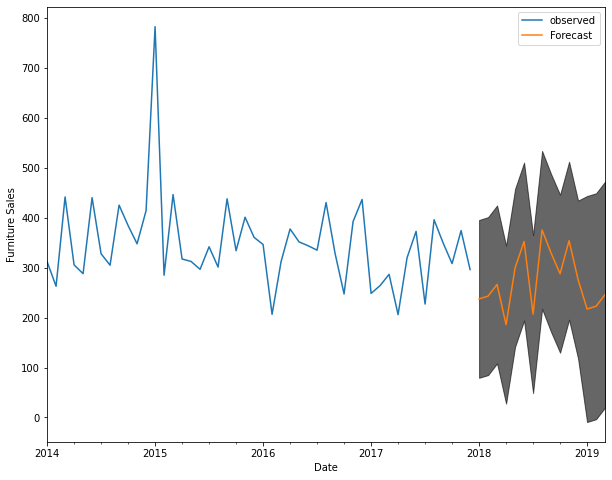

In [30]:
pred_uc = results.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()

ax = furniture_y.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()



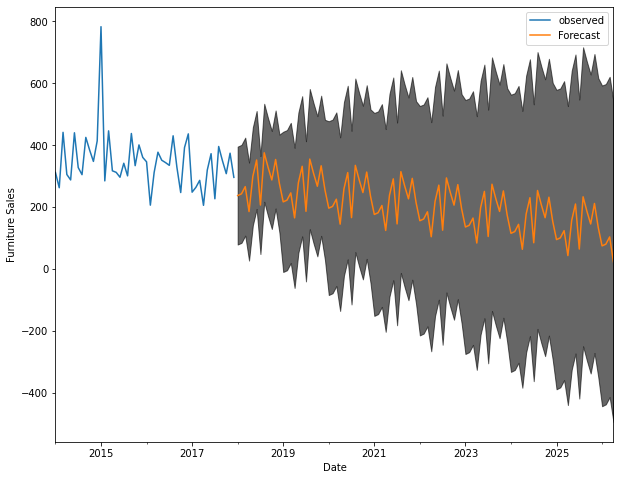

In [31]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = furniture_y.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()